#Question1:What is Boosting in machine learning?Example how it improves weak learners?
--Boosting is an ensemble machine learning technique that converts multiple weak learners (models slightly better than random chance) sequentially into a single strong, highly accurate model. It improves performance by focusing subsequent models on the errors (misclassified data points) of previous models, reducing both bias and variance.

Example of Improving Weak Learners:

Imagine using shallow decision trees ("stumps") to classify data. The first tree makes mistakes on 30% of the data. The boosting algorithm increases the weight of those misclassified points, forcing the second tree to focus on them. After several iterations, each tree specializes in a different, difficult part of the data, and their combined weighted vote results in a highly accurate model.

Important Points:
.Boosting works sequentially rather than in parallel, where each model corrects the errors of its predecessor to reduce bias.

.It improves performance by focusing on misclassified data points and is highly effective at reducing both bias and variance.

#Question2:what is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
--AdaBoost trains sequentially by increasing weights on misclassified data points, forcing subsequent weak learners to focus on hard examples. Gradient Boosting fits new models to the residual errors (gradients) of previous iterations, minimizing a loss function via gradient descent.

* AdaBoost modifies data sample weights based on classification errors, using simple stumps.
* Gradient Boosting fits trees to the residuals of previous models, reducing the overall loss.

#Question3:How does regularization help in XGBoost?
--Regularization in XGBoost prevents overfitting by penalizing complex models . It helps create a simpler, more generalized model that performs better on new, unseen data

#Question4:Why is CatBoost considered efficient for handing categorical data?
--CatBoost efficiently handles categorical data natively using advanced target encoding, eliminating manual pre-processing like one-hot encoding. It utilizes "Ordered Boosting" to prevent target leakage and handles high-cardinality features, reducing dimensionality while producing accurate, fast-training, and robust models.

*Native Categorical Support: It directly processes categorical variables without one-hot encoding, reducing memory usage and handling high-cardinality data effectively.

*Ordered Target Encoding & Boosting: Uses unique target-based statistics that are calculated sequentially, preventing target leakage and overfitting to improve accuracy.


#Question5:what are some real-world applications where boosting techniques are preferred over bagging methods?
--Boosting techniques, such as XGBoost, LightGBM, and AdaBoost, are preferred over bagging (like Random Forest) when maximizing predictive accuracy is critical and high bias exists. They are dominant in structured data tasks like financial fraud detection, customer churn prediction, and Kaggle competitions by sequentially correcting errors.

Key Real-World Applications

*Financial Fraud Detection: Algorithms learn from previous misclassifications, improving detection of rare, complex fraud cases.
*Customer Churn Prediction: Boosted models handle high-bias scenarios to accurately identify customers likely to leave, superior to averaging.
*Medical Diagnosis: High-accuracy boosting improves prediction of diseases, such as diabetes, by iteratively reducing model errors.
*Object Detection/Computer Vision: Algorithms like AdaBoost are used for fast, accurate face detection and recognition systems.

Important Points
.Boosting reduces bias and variance by training models sequentially, where each new model corrects the errors of its predecessor.

.It is generally preferred when the base learner is weak or underfitting, offering better accuracy than bagging, though it is more prone to overfitting.

In [1]:
#Question6:write a python program to:
#.Train an AdaBoost classifier on the Breast cancer dataset
#.Print the model accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Create and Train the AdaBoost Classifier
# Default base estimator is DecisionTreeClassifier(max_depth=1)
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
model = abc.fit(X_train, y_train)

# 4. Predict and Calculate Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")
print(f"Percentage Accuracy: {accuracy * 100:.2f}%")


AdaBoost Classifier Accuracy: 0.9708
Percentage Accuracy: 97.08%


In [2]:
#Question7:write a program to:
#.Train a Gradient Boosting Regressor on the California Housing dataset
#.Evaluate performance using R-squared score
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import pandas as pd

def train_and_evaluate_gradient_boosting():
    """
    Loads the California Housing dataset, trains a Gradient Boosting Regressor,
    and evaluates its performance using the R-squared score.
    """
    # 1. Load the California Housing dataset
    housing_data = fetch_california_housing()
    X = housing_data.data
    y = housing_data.target

    # 2. Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Initialize the Gradient Boosting Regressor
    # Parameters can be tuned for better performance. Default values are often a good starting point.
    gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # 4. Train the model
    print("Training the Gradient Boosting Regressor...")
    gbr_model.fit(X_train, y_train)
    print("Training complete.")

    # 5. Make predictions on the test set
    y_pred = gbr_model.predict(X_test)

    # 6. Evaluate performance using the R-squared score
    # The R-squared score measures the proportion of variance in the target
    # variable that is predictable from the features.
    r2 = r2_score(y_test, y_pred)

    print(f"\nModel Performance:")
    print(f"R-squared score: {r2:.4f}")

    # For additional context, you can also calculate the Mean Squared Error (MSE)
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse:.4f}")

if __name__ == "__main__":
    train_and_evaluate_gradient_boosting()


Training the Gradient Boosting Regressor...
Training complete.

Model Performance:
R-squared score: 0.7756
Mean Squared Error (MSE): 0.2940


In [3]:
#Question8:Write a python program to:
#Train an XGBoost Classifier on the Breast Cancer dataset
#Tune the learning rate using GridSearchCV
#print the best parameters and accuracy
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define the XGBoost Classifier
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 3. Setup GridSearchCV to tune the learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200] # Often tuned alongside learning rate
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4. Print the best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Training CV Accuracy: {grid_search.best_score_:.4f}")

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:33:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.2, 'n_estimators': 100}
Best Training CV Accuracy: 0.9670
Test Set Accuracy: 0.9561


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


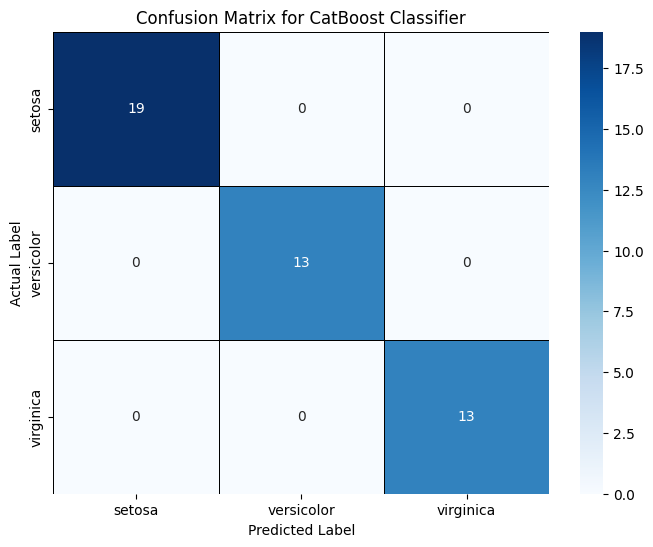

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [5]:
#Question9:write a python program to:
#Train a CatBoost Classifier
#plot the confusion matrix using seaborn

!pip install catboost

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from catboost import CatBoostClassifier
from sklearn.datasets import load_iris

# 1. Load and prepare the data
# Load the Iris dataset from sklearn (a standard classification dataset)
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names # Get the names of the target classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Train the CatBoost Classifier
# Initialize the CatBoost Classifier
# Setting 'verbose=0' to suppress the training output for cleaner code presentation
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)

# Fit the model to the training data
model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = model.predict(X_test)

# 4. Generate and plot the confusion matrix using seaborn
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a pandas DataFrame for better visualization with labels
# Rows are actual labels, columns are predicted labels
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Optional: Print a classification report for more metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

In [ ]:
#Question10:you're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
#The dataset is imbalaned. contains missing values, and has both numeric and categorical features.
# Describe your step-by-step data science pipeline using boosting techniques:

#.Data preprocessing & handling missing/categorical values
#.choice between AdaBoost,XGBoost, or CatBoost
#.Hyperparameter tuning strategy
#.Evaluation metrics you'd choose and  why
#.How the business would benefit from your model


This pipeline outlines a robust, industry-standard approach for predicting loan default using boosting techniques, specifically tailored for imbalanced data with mixed feature types.

1. Data Preprocessing & Handling Missing/Categorical Values
Given that the dataset is imbalanced and contains both numerical and categorical data with missing values, I would choose CatBoost as the primary algorithm due to its native capability to handle categorical features and missing values without extensive preprocessing.

.Handling Missing Values: Rather than imputing with mean/median (which can bias the data), I would allow CatBoost to handle NaNs natively by treating them as a distinct category or using nan_mode='Min/Max'.

.Categorical Features: I would identify categorical columns and pass them to the cat_features parameter in CatBoost. CatBoost uses a sophisticated, ordered target encoding that prevents leakage.

.Imbalance Handling: The dataset is imbalanced. I will use the scale_pos_weight parameter (or class_weights in CatBoost) to penalize the misclassification of the minority class (defaulters) more heavily.

.Data Splitting: Stratified sampling is essential to maintain the ratio of default/no-default in training and testing sets.

2. Choice of Boosting Model: CatBoost

.I choose CatBoost (Categorical Boosting) over XGBoost or AdaBoost because:
Superior Categorical Handling: It handles high-cardinality categorical features  much better than XGBoost or AdaBoost.

.Native Missing Value Support: No manual imputation required.

.Reduced Overfitting: Uses Ordered Boosting to prevent data leakage, crucial for smaller or noisy datasets.

3. Hyperparameter Tuning Strategy

.I would use RandomizedSearchCV combined with 5-fold Stratified Cross-Validation to optimize for F1-Score.
.Key Parameters to Tune:
.iterations (number of trees): 500-1000.
.learning_rate (step size): 0.01 - 0.1.
.depth (tree complexity): 4 - 10.
.l2_leaf_reg (regularization): Prevents overfitting.
.scale_pos_weight (imbalance handling): Set to (number of negative samples / number of positive samples).

4. Evaluation Metrics & Rationale
.Because the dataset is imbalanced, accuracy is misleading. A model predicting "No Default" for everyone might have 95% accuracy but fails to catch any risks.

.Primary Metric: ROC AUC (Receiver Operating Characteristic Area Under Curve): .

.Measures how well the model separates the two classes (defaulter vs. non-defaulter) across thresholds.

.Secondary Metric: F1-Score (or Precision-Recall AUC): Balances Precision (not flagging good customers as risky) and Recall (actually catching the risky ones).

.Confusion Matrix: To visualize Type I (False Positive) and Type II (False Negative) errors, crucial for financial risk management.

5. Business Benefit

.Reduced Non-Performing Loans (NPLs): The model accurately identifies high-risk borrowers, reducing the number of defaults.

.Optimized Loan Approval: Faster, automated decisions speed up the loan application process while ensuring better risk management.

.Improved Portfolio Quality: By filtering risky, high-probability defaulters, the bank maintains a healthier, more profitable loan portfolio.


In [7]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# 1. Load Data (assuming data is already in a dataframe 'df')
# X = features, y = label (1 = Default, 0 = No Default)

# --- FIX START ---
# Create a sample DataFrame 'df' for demonstration purposes
# In a real application, you would load your actual dataset here,
# e.g., df = pd.read_csv('your_loan_data.csv')
data = {
    'age': np.random.randint(20, 60, 1000),
    'income': np.random.randint(30000, 120000, 1000),
    'loan_amount': np.random.randint(5000, 50000, 1000),
    'credit_score': np.random.randint(300, 850, 1000),
    'employment_type': np.random.choice(['Salaried', 'Self-Employed', 'Unemployed'], 1000, p=[0.7, 0.2, 0.1]),
    'education': np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], 1000, p=[0.2, 0.5, 0.2, 0.1]),
    'num_credit_cards': np.random.randint(1, 6, 1000),
    'housing_status': np.random.choice(['Rent', 'Own', 'Mortgage'], 1000, p=[0.3, 0.4, 0.3]),
    'loan_status': np.random.choice([0, 1], 1000, p=[0.9, 0.1]) # Imbalanced dataset
}
df = pd.DataFrame(data)

# Introduce some missing values for demonstration
for col in ['income', 'credit_score', 'employment_type']:
    df.loc[np.random.choice(df.index, 50, replace=False), col] = np.nan
# --- FIX END ---

X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Identify categorical features
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# --- NEW FIX START ---
# Convert NaN in identified categorical features to string 'NaN'
# CatBoost expects categorical features to be strings or integers, not numpy.nan
for col in cat_features:
    if col in X.columns:
        X[col] = X[col].fillna('NaN')
# --- NEW FIX END ---

# 2. Split Data with Stratification (crucial for imbalanced data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Calculate scale_pos_weight for imbalance
# Example: If 90% no default, 10% default, weight = 9
imbalance_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

# 4. Define Model
model = CatBoostClassifier(
    cat_features=cat_features,
    scale_pos_weight=imbalance_ratio,
    loss_function='Logloss',
    verbose=False,
    random_seed=42
)

# 5. Hyperparameter Tuning
param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [300, 500, 1000],
    'l2_leaf_reg': [1, 3, 5, 9]
}

# Using Randomized Search for efficiency
rs = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

print("Starting training...")
rs.fit(X_train, y_train)
best_model = rs.best_estimator_
print(f"Best Parameters: {rs.best_params_}")

# 6. Evaluation
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# 7. Feature Importance
feature_importance = pd.DataFrame(
    {'feature': X.columns, 'importance': best_model.feature_importances_}
).sort_values(by='importance', ascending=False)
print("\nTop 5 Features:\n", feature_importance.head(5))

Starting training...


ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "_catboost.pyx", line 2600, in _catboost.get_cat_factor_bytes_representation
  File "_catboost.pyx", line 2115, in _catboost.get_id_object_bytes_string_representation
_catboost.CatBoostError: bad object for id: nan

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 2395, in _fit
    train_params = self._prepare_train_params(
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 2275, in _prepare_train_params
    train_pool = _build_train_pool(X, y, cat_features, text_features, embedding_features, pairs, graph,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 1513, in _build_train_pool
    train_pool = Pool(X, y, cat_features=cat_features, text_features=text_features, embedding_features=embedding_features, pairs=pairs, graph=graph, weight=sample_weight, group_id=group_id,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 855, in __init__
    self._init(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 1491, in _init
    self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "_catboost.pyx", line 4329, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4381, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4190, in _catboost._PoolBase._init_features_order_layout_pool
  File "_catboost.pyx", line 3087, in _catboost._set_features_order_data_pd_data_frame
  File "_catboost.pyx", line 2607, in _catboost.get_cat_factor_bytes_representation
_catboost.CatBoostError: Invalid type for cat_feature[non-default value idx=13,feature_idx=4]=nan : cat_features must be integer or string, real number values and NaN values should be converted to string.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "_catboost.pyx", line 2600, in _catboost.get_cat_factor_bytes_representation
  File "_catboost.pyx", line 2115, in _catboost.get_id_object_bytes_string_representation
_catboost.CatBoostError: bad object for id: nan

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 2395, in _fit
    train_params = self._prepare_train_params(
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 2275, in _prepare_train_params
    train_pool = _build_train_pool(X, y, cat_features, text_features, embedding_features, pairs, graph,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 1513, in _build_train_pool
    train_pool = Pool(X, y, cat_features=cat_features, text_features=text_features, embedding_features=embedding_features, pairs=pairs, graph=graph, weight=sample_weight, group_id=group_id,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 855, in __init__
    self._init(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 1491, in _init
    self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
  File "_catboost.pyx", line 4329, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4381, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4190, in _catboost._PoolBase._init_features_order_layout_pool
  File "_catboost.pyx", line 3087, in _catboost._set_features_order_data_pd_data_frame
  File "_catboost.pyx", line 2607, in _catboost.get_cat_factor_bytes_representation
_catboost.CatBoostError: Invalid type for cat_feature[non-default value idx=10,feature_idx=4]=nan : cat_features must be integer or string, real number values and NaN values should be converted to string.
